In [88]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [89]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [90]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [91]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [92]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [93]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [94]:
ngo= pd.read_csv("C:\\Users\\Hp\\Downloads\\newstatewise.csv")
ngo.head()

,state,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water_transport,Air_transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,andaman,76670,34026,19560,4634,18451,18738.0,95409,6650,30607,69302,106559,56278,53143,3135.0,69648,NaN,19313.0,9991.0,8380.0,24375.0,41.0,7548,13462,45499,97359,90292,372538,574506,11504.0,13916,572094,4120,138858
1,andhrapradesh,14819416,7893514,4309078,346160,2270664,1484300.0,16303716,4672266,1151729,4664889,10488884,4233400,3716000,517400.0,5076984,424228.0,2816000.0,94200.0,14900.0,780200.0,18700.0,928756,1900863,4405409,2200897,4215389,22032942,48825542,5512100.0,1690800,52646842,501510,104977
2,arunachal,603944,360344,34027,204038,5535,43616.0,647560,19714,89594,124594,233902,70494,67273,3221.0,33414,47.0,16059.0,0.0,0.0,100.0,0.0,17208,23571,44949,183105,189928,545461,1426923,62683.0,29405,1460201,14570,100220
3,assam,3855548,2890544,173478,261987,529539,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,2876251,110904.0,1194568,252509.0,507668.0,4502.0,26223.0,35739.0,10308.0,357619,543651,1412466,1373611,1795658,9307109,18666897,1725309.0,582406,19809800,326780,60621
4,bihar,7951890,4688237,2060296,550132,653224,68107.0,8019997,2189965,345168,3449763,5984896,7448373,7081391,366982.0,3147173,462413.0,1572288.0,2228.0,13599.0,166600.0,10618.0,919427,1178022,3740641,2078171,4587589,22179969,36184863,3213546.0,2006421,37391988,1101240,33954


In [95]:
ngo_dub = ngo.copy()

# Checking for duplicates and dropping the entire duplicate row if any
ngo_dub.drop_duplicates(subset=None, inplace=True)

In [96]:
ngo_dub.shape

(32, 34)

In [97]:
ngo.shape

(32, 34)

In [98]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 34 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   state                                                                 32 non-null     object 
 1   Agriculture, forestry and fishing                                     32 non-null     int64  
 2   Crops                                                                 32 non-null     int64  
 3   Livestock                                                             32 non-null     int64  
 4   Forestry and logging                                                  32 non-null     int64  
 5   Fishing and aquaculture                                               32 non-null     int64  
 6   Mining and quarrying                                                  31 non-null     float64
 7   P

In [99]:
ngo.describe()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water_transport,Air_transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.100000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.000000e+01,3.200000e+01,3.100000e+01,3.000000e+01,26.000000,29.000000,3.100000e+01,31.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,5.941872e+06,3.729864e+06,1.488792e+06,4.452782e+05,2.779374e+05,9.281702e+05,6.841037e+06,5.429669e+06,8.234185e+05,2.925251e+06,9.178338e+06,3.986088e+06,3.646486e+06,3.622421e+05,2.354828e+06,2.587503e+05,1.163881e+06,20360.384615,50918.103448,3.312246e+05,23057.193548,6.071272e+05,1.919315e+06,5.026981e+06,1.467777e+06,2.430649e+06,1.718564e+07,3.320501e+07,4.026368e+06,9.642752e+05,3.626711e+07,3.660713e+05,124912.281250
std,6.630319e+06,4.322617e+06,1.897619e+06,4.874891e+05,4.366190e+05,1.300031e+06,7.411865e+06,7.612428e+06,9.734697e+05,3.347848e+06,1.134767e+07,4.256433e+06,3.864524e+06,4.785351e+05,2.597747e+06,3.337031e+05,1.340093e+06,47899.768472,90968.412681,7.703011e+05,39492.267891,6.520277e+05,3.149849e+06,7.429350e+06,1.469447e+06,2.563038e+06,2.038430e+07,3.727429e+07,5.399834e+06,1.085788e+06,4.155020e+07,4.555881e+05,64267.124802
min,1.623300e+04,1.659000e+03,1.399200e+04,3.880000e+02,1.940000e+02,1.790000e+02,1.641200e+04,6.650000e+03,2.749000e+04,6.930200e+04,1.065590e+05,5.627800e+04,5.314300e+04,2.991000e+03,3.341400e+04,0.000000e+00,1.605900e+04,0.000000,0.000000,-7.600000e+01,0.000000,7.548000e+03,1.346200e+04,4.494900e+04,8.261200e+04,9.029200e+04,3.725380e+05,5.745060e+05,1.150400e+04,1.391600e+04,5.720940e+05,4.120000e+03,33954.000000
25%,3.789852e+05,2.257698e+05,7.472275e+04,5.781525e+04,9.304750e+03,2.683100e+04,5.748960e+05,5.213260e+05,1.186722e+05,1.633822e+05,7.934252e+05,3.832122e+05,3.541682e+05,3.109200e+04,1.482738e+05,7.030000e+02,5.559450e+04,0.000000,3889.000000,1.887500e+03,187.000000,4.352525e+04,8.263350e+04,2.360055e+05,2.966645e+05,2.772475e+05,1.413696e+06,2.638746e+06,1.972902e+05,6.204750e+04,2.698521e+06,2.829225e+04,76131.000000
50%,3.349882e+06,2.212737e+06,4.121605e+05,3.427265e+05,1.088685e+05,2.445490e+05,5.014764e+06,3.204840e+06,5.399455e+05,1.891178e+06,5.877123e+06,2.365130e+06,2.205162e+06,1.449710e+05,1.260088e+06,1.996860e+05,5.578800e+05,587.000000,13469.000000,3.573900e+04,10308.000000,4.186385e+05,6.413540e+05,1.899455e+06,1.177299e+06,1.453945e+06,8.447944e+06,2.044769e+07,2.297230e+06,4.874760e+05,2.165399e+07,2.685750e+05,115791.500000
75%,9.769142e+06,6.092684e+06,2.653859e+06,6.216092e+05,4.642622e+05,1.513076e+06,9.988628e+06,5.988117e+06,1.130098e+06,4.468586e+06,1.088417e+07,6.695278e+06,6.028783e+06,4.797955e+05,3.866079e+06,4.240505e+05,1.934816e+06,15862.750000,36582.000000,1.420345e+05,25843.500000,9.088925e+05,2.022110e+06,6.581544e+06,2.108852e+06,4.159744e+06,2.662971e+07,4.770489e+07,5.240640e+06,1.740402e+06,5.148838e+07,5.345300e+05,152908.750000
max,2.509775e+07,1.621521e+07,7.096876e+06,1.956660e+06,2.270664e+06,5.282727e+06,2.599926e+07,3.366029e+07,4.334702e+06,1.221672e+07,4.744521e+07,1.583910e+07,1.428690e+07,1.643253e+06,9.697246e+06,1.618742e+06,

In [100]:
(ngo.isnull().sum() * 100 / len(ngo)).value_counts(ascending=False)


0.000     26
3.125     4 
6.250     2 
18.750    1 
9.375     1 
dtype: int64

In [101]:
ngo.isnull().sum().value_counts(ascending=False)

0    26
1    4 
2    2 
6    1 
3    1 
dtype: int64

In [102]:
(ngo.isnull().sum(axis=1) * 100 / len(ngo)).value_counts(ascending=False)

0.000     25
3.125     2 
12.500    2 
6.250     2 
9.375     1 
dtype: int64

In [103]:
ngo.isnull().sum(axis=1).value_counts(ascending=False)

0    25
1    2 
4    2 
2    2 
3    1 
dtype: int64

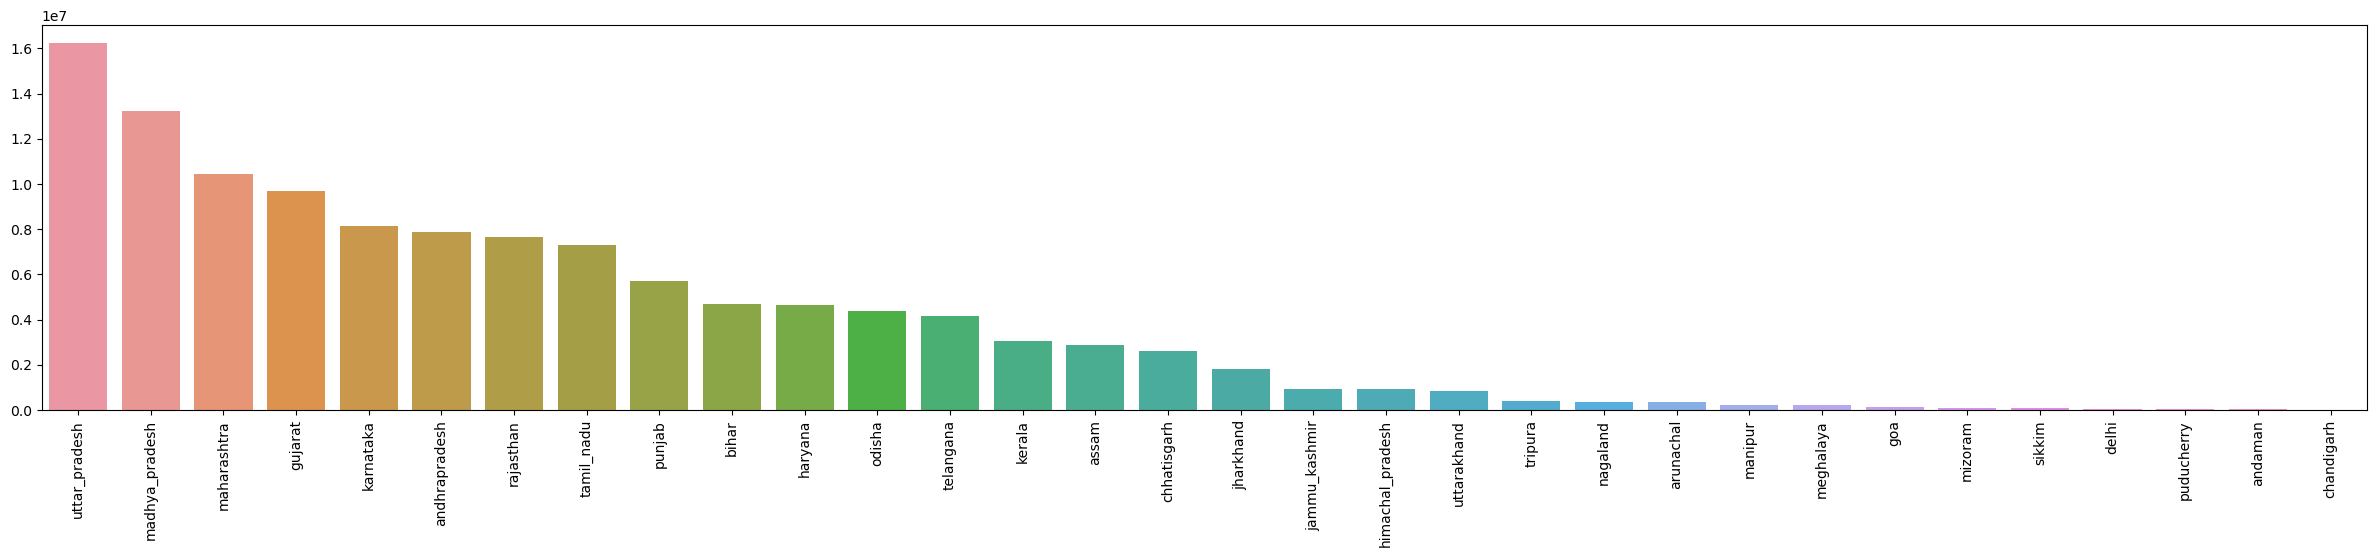

In [104]:

plt.figure(figsize = (30,5))
child_mort = ngo[['state','Crops']].sort_values('Crops', ascending = False)
ax = sns.barplot(x='state', y='Crops', data= child_mort)
ax.set(xlabel = '', ylabel= '')
plt.xticks(rotation=90)
plt.show()

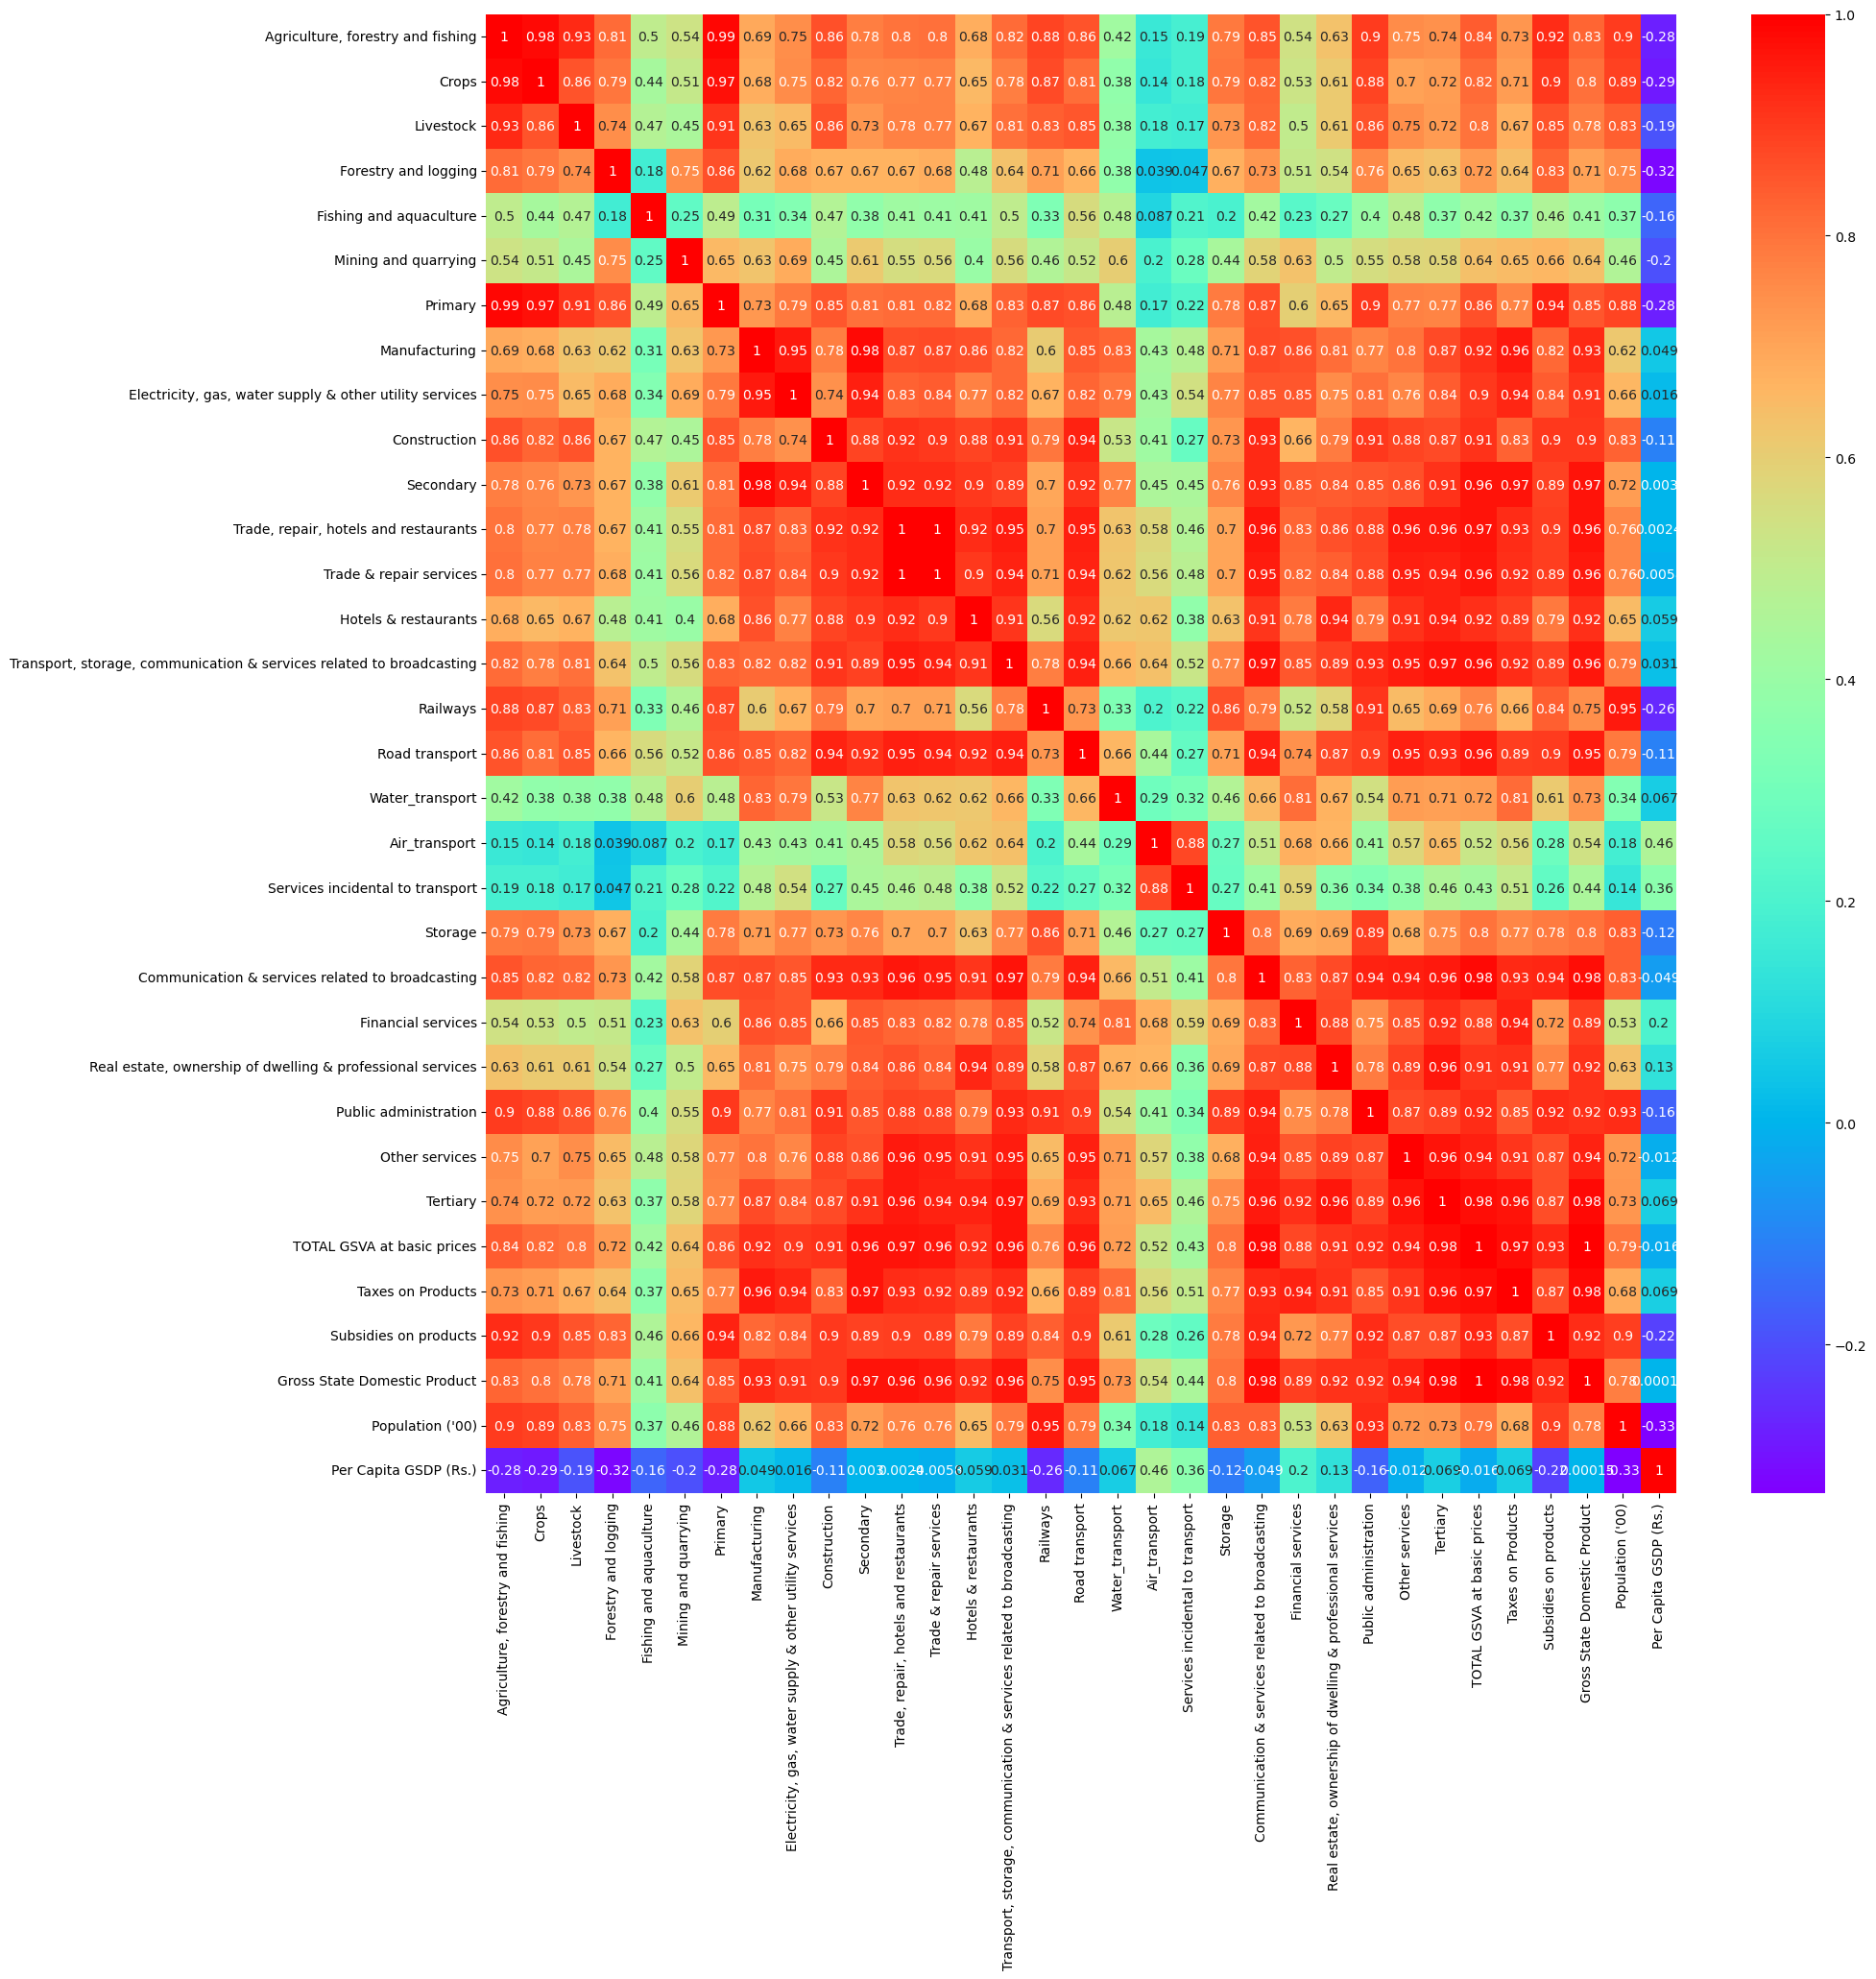

In [105]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(ngo.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [106]:
# # Converting exports,imports and health spending percentages to absolute values.

# ngo['Crops'] = ngo['Crops'] * ngo['Per Capita GSDP (Rs.)']/100
# ngo['Livestock'] = ngo['Livestock'] * ngo['Per Capita GSDP (Rs.)']/100
# ngo['Storage'] = ngo['Storage'] * ngo['Per Capita GSDP (Rs.)']/100

In [107]:
ngo.head()

,state,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water_transport,Air_transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,andaman,76670,34026,19560,4634,18451,18738.0,95409,6650,30607,69302,106559,56278,53143,3135.0,69648,NaN,19313.0,9991.0,8380.0,24375.0,41.0,7548,13462,45499,97359,90292,372538,574506,11504.0,13916,572094,4120,138858
1,andhrapradesh,14819416,7893514,4309078,346160,2270664,1484300.0,16303716,4672266,1151729,4664889,10488884,4233400,3716000,517400.0,5076984,424228.0,2816000.0,94200.0,14900.0,780200.0,18700.0,928756,1900863,4405409,2200897,4215389,22032942,48825542,5512100.0,1690800,52646842,501510,104977
2,arunachal,603944,360344,34027,204038,5535,43616.0,647560,19714,89594,124594,233902,70494,67273,3221.0,33414,47.0,16059.0,0.0,0.0,100.0,0.0,17208,23571,44949,183105,189928,545461,1426923,62683.0,29405,1460201,14570,100220
3,assam,3855548,2890544,173478,261987,529539,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,2876251,110904.0,1194568,252509.0,507668.0,4502.0,26223.0,35739.0,10308.0,357619,543651,1412466,1373611,1795658,9307109,18666897,1725309.0,582406,19809800,326780,60621
4,bihar,7951890,4688237,2060296,550132,653224,68107.0,8019997,2189965,345168,3449763,5984896,7448373,7081391,366982.0,3147173,462413.0,1572288.0,2228.0,13599.0,166600.0,10618.0,919427,1178022,3740641,2078171,4587589,22179969,36184863,3213546.0,2006421,37391988,1101240,33954


In [108]:
ngo_drop = ngo.copy()
country = ngo_drop.pop('state')

In [109]:
ngo_drop.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water_transport,Air_transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,76670,34026,19560,4634,18451,18738.0,95409,6650,30607,69302,106559,56278,53143,3135.0,69648,NaN,19313.0,9991.0,8380.0,24375.0,41.0,7548,13462,45499,97359,90292,372538,574506,11504.0,13916,572094,4120,138858
1,14819416,7893514,4309078,346160,2270664,1484300.0,16303716,4672266,1151729,4664889,10488884,4233400,3716000,517400.0,5076984,424228.0,2816000.0,94200.0,14900.0,780200.0,18700.0,928756,1900863,4405409,2200897,4215389,22032942,48825542,5512100.0,1690800,52646842,501510,104977
2,603944,360344,34027,204038,5535,43616.0,647560,19714,89594,124594,233902,70494,67273,3221.0,33414,47.0,16059.0,0.0,0.0,100.0,0.0,17208,23571,44949,183105,189928,545461,1426923,62683.0,29405,1460201,14570,100220
3,3855548,2890544,173478,261987,529539,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,2876251,110904.0,1194568,252509.0,507668.0,4502.0,26223.0,35739.0,10308.0,357619,543651,1412466,1373611,1795658,9307109,18666897,1725309.0,582406,19809800,326780,60621
4,7951890,4688237,2060296,550132,653224,68107.0,8019997,2189965,345168,3449763,5984896,7448373,7081391,366982.0,3147173,462413.0,1572288.0,2228.0,13599.0,166600.0,10618.0,919427,1178022,3740641,2078171,4587589,22179969,36184863,3213546.0,2006421,37391988,1101240,33954


In [110]:
ngo_drop.shape

(32, 33)

In [111]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

In [112]:
ngo_scaled

array([[-0.89875772, -0.86868101, -0.78663899, ..., -0.87282787,
        -0.80718283,  0.22046831],
       [ 1.36035588,  0.97863695,  1.51000459, ...,  0.40052347,
         0.30204002, -0.31515749],
       [-0.81796057, -0.79198224, -0.77889323, ..., -0.85111155,
        -0.78387842, -0.39036106],
       ...,
       [-0.78794463, -0.78322759, -0.74990141, ..., -0.81427499,
        -0.73084696, -0.75178714],
       [ 2.93536322,  2.93459416,  3.0026148 , ...,  1.66447349,
         3.88897846, -1.1929856 ],
       [-0.66511127, -0.673097  , -0.58766627, ..., -0.4907244 ,
        -0.580383  ,  0.44524112]])

In [113]:
ngo_df1 = pd.DataFrame(ngo_scaled, columns = ['Agriculture, forestry and fishing', 'Crops', 'Livestock', 'Forestry and logging','Fishing and aquaculture',
                                              'Mining and quarrying','Primary', 'Manufacturing', 
                                              'Electricity, gas, water supply & other utility services', 'Construction','Secondary',
                                              'Trade, repair, hotels and restaurants','Trade & repair services','Hotels & restaurants',
                                              'Transport, storage, communication & services related to broadcasting',
                                              'Railways','Road transport','Water_transport','Air_transport','Services incidental to transport',
                                              'Storage','Communication & services related to broadcasting','Financial services',
                                              'Real estate, ownership of dwelling & professional services','Public administration','Other services','Tertiary',
                                              'TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Gross State Domestic Product',
                                              'Population','Per Capita GSDP (Rs.)'])
ngo_df1.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water_transport,Air_transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,-0.898758,-0.868681,-0.786639,-0.918369,-0.603818,-0.711110,-0.924675,-0.723789,-0.827450,-0.866720,-0.812232,-0.938037,-0.944706,-0.763259,-0.893753,NaN,-0.868697,-0.220768,-0.475891,-0.404935,-0.592436,-0.934275,-0.614743,-0.681243,-0.947531,-0.927729,-0.838004,-0.889423,-0.755413,-0.889276,-0.872828,-0.807183,0.220468
1,1.360356,0.978637,1.510005,-0.206577,4.637022,0.434853,1.297122,-0.101088,0.342654,0.527943,0.117338,0.059033,0.018275,0.329778,1.064658,0.504080,1.253915,1.572073,-0.402949,0.592492,-0.112154,0.501168,-0.005952,-0.085003,0.506891,0.707480,0.241601,0.425775,0.279547,0.679829,0.400523,0.302040,-0.315157
2,-0.817961,-0.791982,-0.778893,-0.502781,-0.633873,-0.691657,-0.848987,-0.722046,-0.765886,-0.849940,-0.800830,-0.934644,-0.940992,-0.763076,-0.907925,-0.788065,-0.871167,-0.433480,-0.569641,-0.436970,-0.593492,-0.919223,-0.611482,-0.681318,-0.888245,-0.888233,-0.829385,-0.866189,-0.745784,-0.874783,-0.851112,-0.783878,-0.390361
3,-0.319699,-0.197276,-0.704230,-0.382007,0.585470,0.424570,-0.207582,-0.457353,-0.549849,-0.361651,-0.460674,-0.238443,-0.202498,-0.534203,-0.453788,-0.019012,-0.498049,-0.337631,-0.276274,-0.389938,-0.328164,-0.388788,-0.443728,-0.494303,-0.065108,-0.251714,-0.392684,-0.396272,-0.432954,-0.357325,-0.402420,-0.087623,-1.016383
4,0.308006,0.225259,0.305988,0.218531,0.873282,-0.672507,0.161609,-0.432391,-0.499145,0.159178,-0.285921,0.826440,0.903052,0.010074,0.309893,0.620400,0.309970,-0.386045,-0.417504,-0.217247,-0.320185,0.486631,-0.239108,-0.175913,0.422037,0.855022,0.248929,0.081223,-0.152936,0.975164,0.027506,1.639490,-1.437962


In [114]:
ngo_df1.dropna(axis=1, inplace=True)
ngo_df1 = ngo_df1.reset_index(drop=True)

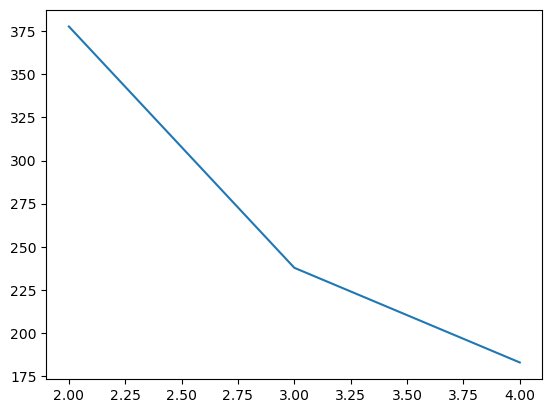

In [115]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,5))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(ngo_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [116]:
pip install pandas scikit-learn matplotlib tk


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Tk, StringVar, OptionMenu, Button, ttk

# Read your dataset
ngo_df1 = pd.read_csv("C:\\Users\\Hp\\Downloads\\newstatewise.csv")

# Drop rows with NaN values
ngo_df1 = ngo_df1.dropna()

# Create the UI
class ClusteringApp:
    def __init__(self, root):
        self.root = root
        root.title("K-Means Clustering App")

        # Make the UI full screen
        root.attributes('-fullscreen', True)
        root.bind('<Escape>', lambda event: root.attributes('-fullscreen', False))

        # Options for feature selection
        self.features = list(ngo_df1.columns)
        self.selected_features = [StringVar(), StringVar()]

        # Create a style for a more modern look
        style = ttk.Style()
        style.theme_use('clam')  # Other themes: 'alt', 'default', 'classic'

        # Frame to hold UI elements
        left_frame = ttk.Frame(root, style='Green.TFrame')  # Green color for the left frame
        left_frame.grid(row=0, column=0, rowspan=6, padx=20, pady=20, sticky='nsw')

        # Label for the title
        title_label = ttk.Label(left_frame, text="K-Means Clustering", font=('Helvetica', 16, 'bold'), style='Green.TLabel')
        title_label.grid(row=0, column=0, columnspan=2, pady=10, sticky='w')

        # Dropdown menus for feature selection
        for i in range(2):
            label_feature = ttk.Label(left_frame, text=f"Select Feature {i + 1}:", style='Green.TLabel')
            label_feature.grid(row=i+1, column=0, padx=10, pady=5, sticky='w')
            menu_feature = OptionMenu(left_frame, self.selected_features[i], *self.features)
            menu_feature.grid(row=i+1, column=1, padx=10, pady=5, sticky='ew')

        # Button to perform clustering
        button_cluster = ttk.Button(left_frame, text="Cluster", command=self.perform_clustering, style='Colorful.TButton')
        button_cluster.grid(row=4, column=0, columnspan=2, pady=10, sticky='ew')

        # Canvas to display the clustering plot
        self.canvas = None

        # Frame to hold the graph
        right_frame = ttk.Frame(root, style='Blue.TFrame')  # Blue color for the right frame
        right_frame.grid(row=0, column=1, rowspan=6, padx=20, pady=20, sticky='nsew')

        # Table to display state names and cluster assignments
        self.table = ttk.Treeview(left_frame, columns=('State', 'Cluster Assignment'), show='headings', style='Colorful.Treeview')
        self.table.heading('State', text='State')
        self.table.heading('Cluster Assignment', text='Cluster Assignment')
        self.table.grid(row=5, column=0, columnspan=2, pady=10)

        # Configure row and column weights for better resizing behavior
        for i in range(6):
            root.grid_rowconfigure(i, weight=1)
        root.grid_columnconfigure(0, weight=1)
        root.grid_columnconfigure(1, weight=2)

    def perform_clustering(self):
        # Get selected features
        selected_features = [var.get() for var in self.selected_features]

        # Extract relevant features from the dataset
        features = ngo_df1[selected_features]

        # Standardize the data
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)

        # Choose the number of clusters (K)
        k = 3  # Adjust the number of clusters as needed

        # Create and fit the K-Means model
        kmeans = KMeans(n_clusters=k, random_state=42)
        ngo_df1['cluster'] = kmeans.fit_predict(scaled_features)

        # Get the cluster assignments for each data point
        cluster_assignments = kmeans.labels_
        ngo_df1['cluster_assignment'] = cluster_assignments

        # Display the result on the Canvas widget
        self.show_clustering_plot(selected_features[0], selected_features[1], scaler.inverse_transform(kmeans.cluster_centers_))

        # Update the table with state names and cluster assignments
        self.update_table()

    def update_table(self):
        # Clear existing data in the table
        for row in self.table.get_children():
            self.table.delete(row)

        # Insert new data into the table
        for i, (state, assignment) in enumerate(zip(ngo_df1['state'], ngo_df1['cluster_assignment'])):
            self.table.insert('', 'end', values=(state, assignment))

    def show_clustering_plot(self, x_feature, y_feature, centroids):
        # Clear previous plot if Canvas exists
        if self.canvas:
            self.canvas.get_tk_widget().destroy()

        # Create a new figure and plot
        fig, ax = plt.subplots(figsize=(8, 6), facecolor='#2196F3')  # Adjust the figure size and background color as needed
        scatter = ax.scatter(ngo_df1[x_feature], ngo_df1[y_feature], c=ngo_df1['cluster'], cmap='viridis')
        #ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
        ax.set_xlabel(x_feature, fontdict={'fontsize': 12})
        ax.set_ylabel(y_feature, fontdict={'fontsize': 12})
        ax.set_title('K-Means Clustering of States', fontdict={'fontsize': 14})

        # Add a legend
        legend = ax.legend(*scatter.legend_elements(), title="Clusters", fontsize='small')
        ax.add_artist(legend)

        # Embed the plot in the Tkinter window
        self.canvas = FigureCanvasTkAgg(fig, master=self.root)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.grid(row=0, column=1, rowspan=6, pady=10, padx=10, sticky='nsew')  # Adjust the row, column, rowspan, and padx as needed

# Create and run the UI
root = Tk()

# Define styles
style = ttk.Style()

# Green frame style
style.configure('Green.TFrame', background='#4CAF50')  # Green color for the left frame
style.map('Green.TFrame', background=[('selected', '#4CAF50')])

# Blue frame style
style.configure('Blue.TFrame', background='#2196F3')  # Blue color for the right frame
style.map('Blue.TFrame', background=[('selected', '#2196F3')])

# Green label style
style.configure('Green.TLabel', background='#4CAF50', foreground='white')

# Colorful button style
style.configure('Colorful.TButton', background='#FF9800', foreground='white', font=('Helvetica', 12))

# Colorful Treeview style
style.configure('Colorful.Treeview', background='#FFEB3B', foreground='black', font=('Helvetica', 10))

app = ClusteringApp(root)
root.mainloop()
